# Example Analysis Notebook for Interface Mixing with rsflash

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 

In [2]:
plt.matplotlib.rc('xtick', labelsize=30)
plt.matplotlib.rc('ytick', labelsize=30)

Load the dataset

In [3]:
# path='/home/vagrant/jupyter/StaffScratch/diaw/PlasmaP/Multi-BGK/Data/ko-fe/'
path='/home/vagrant/jupyter/StaffScratch/diaw/PlasmaP/Multi-BGK/Data/'
path_to_rsflash = '/home/vagrant/jupyter/StaffScratch/abdoudiaw/rsflash/'
if not path_to_rsflash in sys.path: sys.path.insert(1, path_to_rsflash)

In [4]:
prefix = "modmd_script"
x = np.loadtxt(path+prefix + "_x")
x = x * 10000 #convert to microns
time = np.loadtxt(path+prefix + "_time")

In [5]:
len(time)

3

In [6]:
idx=-1

## Plotting the spatial profiles: densities, velocities, temperatures

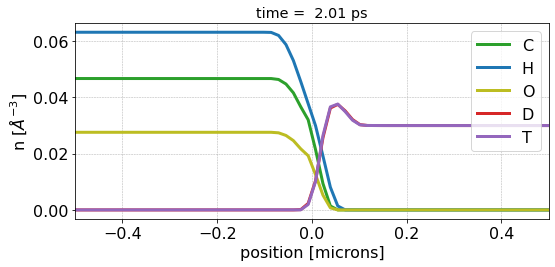

In [18]:
fig, ax1 = plt.subplots(1,1)

ax1.grid(linestyle='dashed', linewidth='0.5')

LW=16
mpl.rcParams['figure.figsize'] = 8,4
mpl.rc('font', size = LW)
mpl.rc('xtick', labelsize=LW)
mpl.rc('ytick', labelsize=LW)


colors=['#2ca02c','#1f77b4','#bcbd22', '#d62728', '#9467bd']
labels=['C', 'H', 'O','D', 'T']
mass = np.array([1.9926e-23,1.6605e-24,2.6566e-23,3.3210778e-24,5.0083e-24])
eps=1.e-20
cvt=1.6008e-19  # units conversion

with mpl.style.context('rs_paper'):
    for i in [0,1,2,3,4]:
        dens = np.loadtxt(path+prefix + "_dens"+str(i))
        if i ==2:
            ax1.plot(x,dens[idx]*1.e-24*50,color=colors[i],label=str(labels[i]),linewidth=3.0)
        else:
            ax1.plot(x,dens[idx]*1.e-24,color=colors[i],label=str(labels[i]),linewidth=3.0)
    ax1.set_xlim(-0.5,0.5) 
    ax1.set_title('time =  {:.2f} ps'.format(time[idx]*1e12))
    ax1.set_ylabel(r'n [$\AA^{-3}$]', size=LW)
    ax1.set_xlabel(r'position [microns]', size=LW)
plt.legend()
plt.tight_layout() 
fig.savefig('modmd_testcase_dens_time_'+str(int(time[idx]*1e12))+'_ps.png',dpi=300, bbox_inches = "tight",facecolor='w')

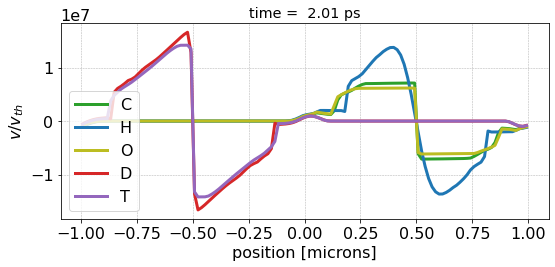

In [19]:
fig, ax2 = plt.subplots(1,1)

ax2.grid(linestyle='dashed', linewidth='0.5')

LW=16
mpl.rcParams['figure.figsize'] = 8,4
mpl.rc('font', size = LW)
mpl.rc('xtick', labelsize=LW)
mpl.rc('ytick', labelsize=LW)
L=200

colors=['#2ca02c','#1f77b4','#bcbd22', '#d62728', '#9467bd']
labels=['C','H','O','D','T']
mass = np.array([1.9926e-23,1.6605e-24,2.6566e-23,3.3210778e-24,5.0083e-24])
eps=1.e-20
cvt=1.6008e-19  # units conversion

with mpl.style.context('rs_paper'):
    for i in [0,1,2,3,4]:
#         print(i)
        velo = np.loadtxt(path+prefix + "_velo"+str(i)) 
#         temp = np.loadtxt(path+prefix + "_temp"+str(i)) 
#         ax2.plot(x,velo[idx]/np.sqrt((cvt*temp[idx]+eps)/(1.e-3*mass[i])),label=str(labels[i]),linewidth=3.0)     
        ax2.plot(x,velo[idx],color=colors[i],label=str(labels[i]),linewidth=3.0)      


#     ax2.set_xlim(-10.5,10.5) 
#     ax2.set_xlim(-0.5,0.85) 
    ax2.set_title('time =  {:.2f} ps'.format(time[idx]*1e12))
    ax2.set_ylabel(r'$v/v_{th}$', size=LW)
    ax2.set_xlabel(r'position [microns]', size=LW)

plt.legend()
plt.tight_layout() 

fig.savefig('modmd_testcase_velo_time_'+str(int(time[idx]*1e12))+'_ps.png',dpi=300, bbox_inches = "tight",facecolor='w')

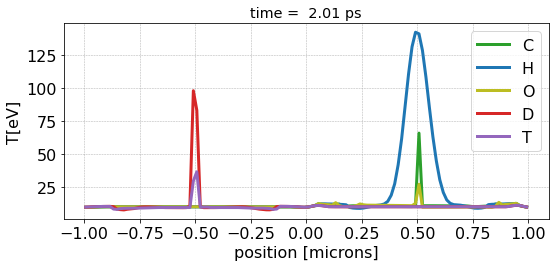

In [20]:
fig, ax3 = plt.subplots(1,1)
ax3.grid(linestyle='dashed', linewidth='0.5')
LW=16
mpl.rcParams['figure.figsize'] = 8,4
mpl.rc('font', size = LW)
mpl.rc('xtick', labelsize=LW)
mpl.rc('ytick', labelsize=LW)

colors=['#2ca02c','#1f77b4','#bcbd22', '#d62728', '#9467bd']
labels=['C', 'H', 'O','D', 'T']
mass = np.array([1.9926e-23,1.6605e-24,2.6566e-23,3.3210778e-24,5.0083e-24])
eps=1.e-20
cvt=1.6008e-19  # units conversion

with mpl.style.context('rs_paper'):
    for i in [0,1,2,3,4]:
        temp = np.loadtxt(path+prefix + "_temp"+str(i)) 
        ax3.plot(x,temp[idx],color=colors[i],label=str(labels[i]),linewidth=3.0)

#     ax3.set_xlim(-5.5,5.5) 
    ax3.set_title('time =  {:.2f} ps'.format(time[idx]*1e12))
    ax3.set_ylabel(r'T[eV]', size=LW)
    ax3.set_xlabel(r'position [microns]', size=LW)

plt.legend()
plt.tight_layout() 
fig.savefig('modmd_testcase_temp_time_'+str(int(time[idx]*1e12))+'_ps.png',dpi=300, bbox_inches = "tight",facecolor='w')

## Sanity check to make sure we are not spitting negative temperatures 

In [10]:
for i in range(4):
    temp = np.loadtxt(path+prefix + "_temp"+str(i))
    print(str(labels[i])+' min and max temperature at final time, t ='+str(time[idx])+", are :", temp[idx].min(), temp[idx].max()) 

C min and max temperature at final time, t =2.01e-12, are : 9.432559 65.96519
H min and max temperature at final time, t =2.01e-12, are : 8.757283 142.6137
O min and max temperature at final time, t =2.01e-12, are : 9.486289 27.13421
D min and max temperature at final time, t =2.01e-12, are : 7.596087 98.18871
